Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Dataset

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
X = pd.DataFrame(digits['data'], columns=digits['feature_names'])
y = pd.DataFrame(digits['target'], columns=['target'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

EDA

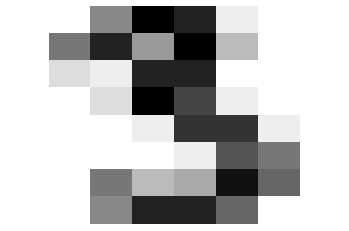

In [ ]:
sns.heatmap(np.asarray(X.iloc[3]).reshape(8,8),cmap='binary',xticklabels=False,yticklabels=False,cbar=False)

In [ ]:
# convert data to binary class
def conv_to_bin(x):
    if x==5:
        return 1
    return 0

In [ ]:
y['target'] = y['target'].apply(conv_to_bin)

In [ ]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1792,0
1793,0
1794,0
1795,0


Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Model

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
model = SGDClassifier()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier()

In [ ]:
pred = model.predict(X_test)

Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       481
           1       0.86      0.97      0.91        59

    accuracy                           0.98       540
   macro avg       0.93      0.97      0.95       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
print(confusion_matrix(y_test, pred))

[[472   9]
 [  2  57]]
